In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_images = np.load('drive/MyDrive/Colab Notebooks/train_images.npy')
train_labels = np.load('drive/MyDrive/Colab Notebooks/train_labels.npy')
test_images = np.load('drive/MyDrive/Colab Notebooks/test_images.npy')
test_labels = np.load('drive/MyDrive/Colab Notebooks/test_labels.npy')

In [ ]:
train_images = np.array(train_images).reshape(-1, 96, 96, 4) / 255.0
test_images = np.array(test_images).reshape(-1, 96, 96, 4) / 255.0

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(96, 96, 4)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # 이진 분류를 위해서 레이어 유닛 수를 1로 변경하고 활성화 함수를 sigmoid로 설정
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
import keras

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 2:
        lrate = 0.0005
    if epoch > 4:
        lrate = 0.0001
    if epoch > 6:
        lrate = 0.00005
    return lrate

checkpoint = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
# N번의 연속적인 epoch 동안 개선이 없을 때 학습이 중단되도록 함
early_stopping = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [ ]:
from keras.callbacks import LearningRateScheduler

history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels),
                    callbacks = [checkpoint, early_stopping, LearningRateScheduler(lr_schedule)])

Epoch 1/10
312/312 [==============================] - 8s 16ms/step - loss: 0.5206 - acc: 0.7066 - val_loss: 0.5670 - val_acc: 0.7223 - lr: 0.0010
Epoch 2/10
312/312 [==============================] - 4s 13ms/step - loss: 0.1452 - acc: 0.9410 - val_loss: 0.6086 - val_acc: 0.7541 - lr: 0.0010
Epoch 3/10
312/312 [==============================] - 4s 13ms/step - loss: 0.0721 - acc: 0.9744 - val_loss: 0.5576 - val_acc: 0.7719 - lr: 0.0010
Epoch 4/10
312/312 [==============================] - 4s 12ms/step - loss: 0.0254 - acc: 0.9927 - val_loss: 0.6928 - val_acc: 0.7862 - lr: 5.0000e-04
Epoch 5/10
312/312 [==============================] - 4s 13ms/step - loss: 0.0111 - acc: 0.9977 - val_loss: 0.7754 - val_acc: 0.7779 - lr: 5.0000e-04
Epoch 6/10
312/312 [==============================] - 4s 13ms/step - loss: 0.0065 - acc: 0.9989 - val_loss: 0.7489 - val_acc: 0.7806 - lr: 1.0000e-04
Epoch 7/10
312/312 [==============================] - 4s 12ms/step - loss: 0.0037 - acc: 0.9999 - val_loss: 0.75

In [ ]:
from keras.models import load_model

model = load_model('best_cnn_model.h5')

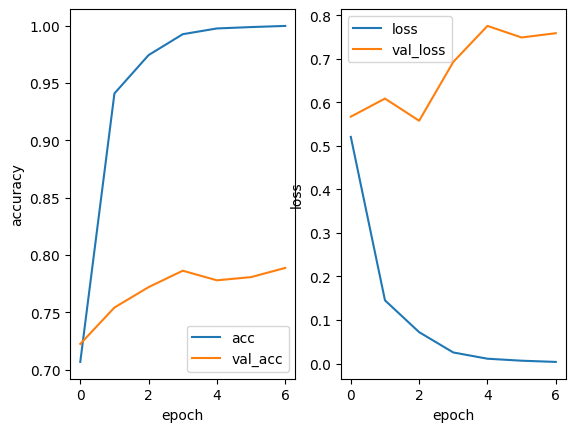

90/90 - 1s - loss: 0.5576 - acc: 0.7719 - 543ms/epoch - 6ms/step


In [ ]:
import matplotlib.pyplot as plt

plt.figure()

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')

plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)